# Plotting Orbits

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# a sun
mass_of_star = 1.0 #Msun

In [19]:
rp = 1.0 #AU (astronomical unit)
vp = 35.0 #km/s

In [20]:
MassOfSun = 2e33 #g
MassOfJupiter = 1.898e30 #g
AUinCM = 1.496e13 #AU in CM
kmincm = 1e5 #cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

In [21]:
mass_of_star = mass_of_star * MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

Analytical Solution

In [25]:
ecc = rp*vp*vp/(G*mass_of_star)-1.0 #eccentricity
a = rp/(1.0-ecc)#semi-major axis

print('Eccentricity = ' + str(ecc))
Porb = np.sqrt(4.0*np.pi**2.0*a**3.0/(G*mass_of_star))
print('Orbital period = ' + str(Porb) + ' sec')
print('Orbital period = ' + str(Porb/3.15e7) + ' years')

Eccentricity = 0.37293976625711744
Orbital period = 63373146.369 sec
Orbital period = 2.01184591648 years


Check for bound orbits

In [26]:
if ecc < 0 :
    print('ecc is less than zero we should stop!')
elif (ecc >= 1):
    print("ecc is >1, probably shouldn't go on!")
else:
    print('all ok! go on!')

all ok! go on!


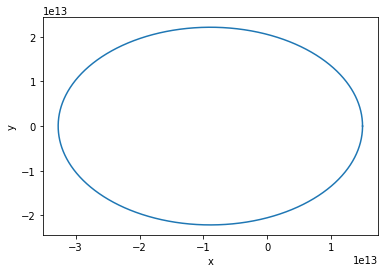

In [32]:
theta = np.arange(0, 2*np.pi, 0.001)
r = (a*(1-ecc**2))/(1+ecc*np.cos(theta))

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y)
plt.show()

In [29]:
theta = np.linspace(0,2*np.pi,500)
theta

array([ 0.        ,  0.01259155,  0.02518311,  0.03777466,  0.05036621,
        0.06295777,  0.07554932,  0.08814088,  0.10073243,  0.11332398,
        0.12591554,  0.13850709,  0.15109864,  0.1636902 ,  0.17628175,
        0.18887331,  0.20146486,  0.21405641,  0.22664797,  0.23923952,
        0.25183107,  0.26442263,  0.27701418,  0.28960574,  0.30219729,
        0.31478884,  0.3273804 ,  0.33997195,  0.3525635 ,  0.36515506,
        0.37774661,  0.39033817,  0.40292972,  0.41552127,  0.42811283,
        0.44070438,  0.45329593,  0.46588749,  0.47847904,  0.4910706 ,
        0.50366215,  0.5162537 ,  0.52884526,  0.54143681,  0.55402836,
        0.56661992,  0.57921147,  0.59180302,  0.60439458,  0.61698613,
        0.62957769,  0.64216924,  0.65476079,  0.66735235,  0.6799439 ,
        0.69253545,  0.70512701,  0.71771856,  0.73031012,  0.74290167,
        0.75549322,  0.76808478,  0.78067633,  0.79326788,  0.80585944,
        0.81845099,  0.83104255,  0.8436341 ,  0.85622565,  0.86

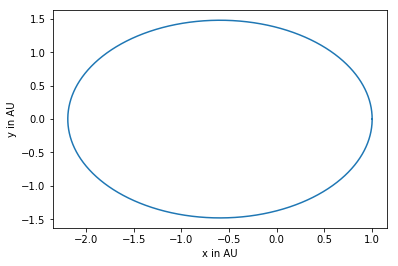

In [35]:
r = a*(1-ecc**2)/(1+ecc*np.cos(theta))
r/AUinCM

x = r*np.cos(theta)
y =r*np.sin(theta)

plt.plot(x/AUinCM,y/AUinCM)

plt.xlabel('x in AU')
plt.ylabel('y in AU')

plt.show()

Function to calculate acceleration:

In [51]:
#mStar is in g, rStar is a 2D vector representing 
# distance from planet to star with (x,y) components (in cm)
def calcAcc(mStar, rStar):
    #mag(r)=sqrt(r_x^2 + r_y^2)
    mag_r=(rStar[0]**2 + rStar[1]**2)**0.5
    #print('mag_r', mag_r)
    #acc due to gravity: a = -G*M/mag_r^2
    mag_a=-G*mStar/mag_r**2
    #direction = planet is being pulled back towards the sun
    unitVector=rStar/mag_r
    acc=mag_a*unitVector
    return acc

In [44]:
radius_to_star= 5.0*AUinCM
print('radius to star outside of function = ', radius_to_star)

acc = calcAcc(mass_of_star, np.array([radius_to_star,0])) #only has x component
print(acc)

radius to star outside of function =  74800000000000.0
mag_r 7.48e+13
[-0.02385684 -0.        ]


Our initial conditions:

In [45]:
r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

How big will our time step be? delta t

In [119]:
delta_t = 1e3 #sec
n_step = 500000 #no. of steps for our whole simulation

In [120]:
#r = np.array([]) WRONG!
r=[]
ri = r_0 # initial starting radius
vi = v_0 # initial starting velocity
for i in range(n_step): # for 50 steps
    #1. calculate acceleration of gravity at a particular position
    ag = calcAcc(mass_of_star, ri)
    #2. update velocity based on this acceleration 
    vip1 = vi + ag*delta_t
    #3. update position from new or old velocity
    rip1 = ri + vi*delta_t
    
    #bookkeeping
    #1. save our new radius
    #r = np.append(r, rip1) WRONG!
    r.append(rip1)
    #2. update "initial" conditions for next loop
    ri = rip1
    vi = vip1
    
r=np.array(r)

In [121]:
r

array([[  1.49600000e+13,   3.50000000e+09],
       [  1.49599994e+13,   7.00000000e+09],
       [  1.49599982e+13,   1.04999999e+10],
       ..., 
       [ -1.04453358e+13,  -2.24035450e+13],
       [ -1.04430397e+13,  -2.24036627e+13],
       [ -1.04407435e+13,  -2.24037802e+13]])

In [122]:
r/AUinCM

array([[  1.00000000e+00,   2.33957219e-04],
       [  9.99999960e-01,   4.67914439e-04],
       [  9.99999880e-01,   7.01871648e-04],
       ..., 
       [ -6.98217631e-01,  -1.49756317e+00],
       [ -6.98064150e-01,  -1.49757103e+00],
       [ -6.97910663e-01,  -1.49757889e+00]])

Plot and compare to analytical solutions

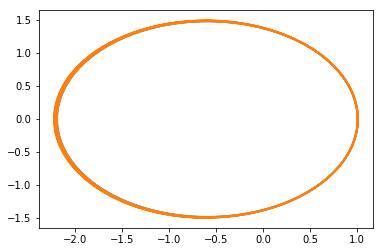

In [123]:
plt.plot(x/AUinCM, y/AUinCM)
plt.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)
plt.show()

In [124]:
#MAKE TIMESTEP SMALLER TO GET BETTER SOLUTION

# Full 2-body motion

In [125]:
#mStar is in g, rStar is a 2D vector representing 
# distance from planet to star with (x,y) components (in cm)
def calcAcc(m2, r1, r2):
    #mag(r)=sqrt(r_x^2 + r_y^2)
    mag_r=((r1[0]-r2[0])**2 + (r1[1]-r2[1])**2)**0.5
    #acc due to gravity: a = -G*M/mag_r^2
    mag_a=-G*m2/mag_r**2
    #direction = planet is being pulled back towards the sun
    unitVector=(r1-r2)/mag_r
    acc=mag_a*unitVector
    return acc

In [151]:
#initial conditions
mass_of_particle1 = 0.0009 #Msun
rp = 1.0 #AU
vp = 35.0 #km/s

mass_of_particle1 = mass_of_particle1*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

In [152]:
mass_of_particle2 = 1 #Msun = Mass jupiter
mass_of_particle2 = mass_of_particle2*MassOfSun

In [153]:
r_0 = np.array([[rp, 0], [0, 0]])
v_0 = np.array([[0, vp], [0, 0]])

In [154]:
r_0

array([[  1.49600000e+13,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]])

In [155]:
#r = np.array([]) WRONG!
r=[]
ri = r_0 # initial starting radius
vi = v_0 # initial starting velocity
for i in range(n_step): # for 50 steps
    #1. calculate acceleration of gravity at a particular position
    ag_particle1 = calcAcc(mass_of_particle2, ri[0,:], ri[1,:])
    ag_particle2 = calcAcc(mass_of_particle1, ri[1,:], ri[0,:])
    #format the acceleration vector
    ag = np.array([ag_particle1, ag_particle2])
    #2. update velocity based on this acceleration 
    vip1 = vi + ag*delta_t
    #3. update position from new or old velocity
    rip1 = ri + vi*delta_t
    
    #bookkeeping
    #1. save our new radius
    #r = np.append(r, rip1) WRONG!
    r.append(rip1)
    #2. update "initial" conditions for next loop
    ri = rip1
    vi = vip1
    
r=np.array(r)
r.shape

(500000, 2, 2)

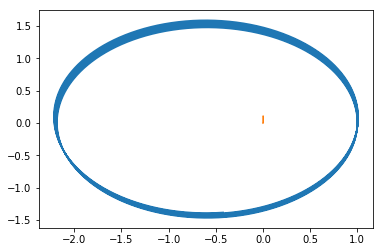

In [156]:
plt.plot(r[:,0,0]/AUinCM, r[:,0,1]/AUinCM)
plt.plot(r[:,1,0]/AUinCM, r[:,1,1]/AUinCM)
plt.show()

In [158]:
# for 2 bodies:

# energy
# I'll write this a little fancy
def calcE(m1, m2, r1, r2, v1, v2):
    mag_r = np.sqrt( (r1-r2).dot(r1-r2) )
    return 0.5*(m1*v1.dot(v1) + m2*v2.dot(v2)) - G*m1*m2/mag_r

# angular momentum
def calcL(m1, m2, r1, r2, v1, v2):
    L = m1*np.cross(r1,v1) + m2*np.cross(r2,v2)
    #mag_L = np.sqrt( L.dot(L) )
    # for 2 dimensions
    mag_L = np.sqrt(L*L)
    return mag_L

In [159]:
r = []
E = []
L = []
t = []
ri = r_0
vi = v_0
for i in range(n_step): # for 50 steps
    #1. calculate acceleration of gravity at a particular position
    ag_particle1 = calcAcc(mass_of_particle2, ri[0,:], ri[1,:])
    ag_particle2 = calcAcc(mass_of_particle1, ri[1,:], ri[0,:])
    #format the acceleration vector
    ag = np.array([ag_particle1, ag_particle2])
    #2. update velocity based on this acceleration 
    vip1 = vi + ag*delta_t
    #3. update position from new or old velocity
    rip1 = ri + vi*delta_t
    
    #bookkeeping
    #1. save our new radius
    #r = np.append(r, rip1) WRONG!
    r.append(rip1)
    t.append(i*delta_t)
    Eupdated =calcE(mass_of_particle1, mass_of_particle2, ri[0,:], ri[1,:], vi[0,:], vi[1,:])
    E.append(Eupdated)
    #2. update "initial" conditions for next loop
    ri = rip1
    vi = vip1
    
r=np.array(r)
E = np.array(E)
E

array([ -5.03542781e+42,  -5.03542705e+42,  -5.03542629e+42, ...,
        -4.96234106e+42,  -4.96234097e+42,  -4.96234088e+42])

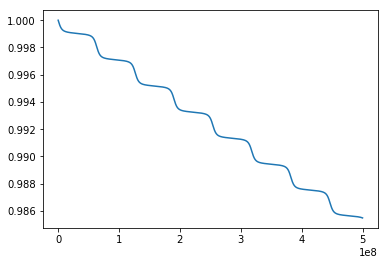

In [162]:
plt.plot(t, E/E[0])

Making a fancy figure:

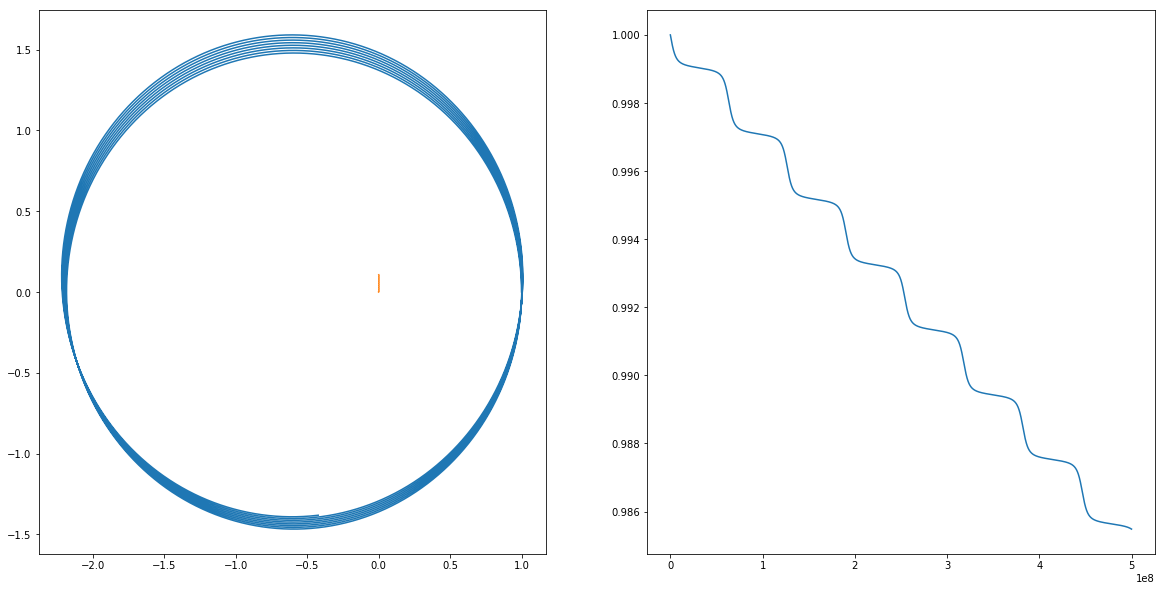

In [164]:
fig,ax = plt.subplots(1,2, figsize=(10*2,10))

ax[0].plot(r[:,0,0]/AUinCM, r[:,0,1]/AUinCM)
ax[0].plot(r[:,1,0]/AUinCM, r[:,1,1]/AUinCM)
plt.plot(t, E/E[0])
plt.show()